<a href="https://colab.research.google.com/github/cbsebastian24/Trex/blob/main/Copy_of_Breakout_3b_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Hypothesis Testing with Class Data

**Tests covered:**
- Z-test for a **proportion** (notes on laptop/tablet vs paper and siblings)
- Z-test for a **mean with known σ** (phone minutes)
- **One-sample t-tests** for unknown σ (commute minutes)



In [4]:
#@title Imports
import numpy as np
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)


In [5]:
#@title Random seed & alpha
# Use mmdd of your birthday (e.g., 217 for Feb 17) to set your seed
seed = 217
np.random.seed(int(seed))

alpha = 0.1  #Use this alpha for all the tests.
print(f"Seed set to {seed}. Primary alpha = {alpha}")

Seed set to 217. Primary alpha = 0.1


## Load class data from Google Drive

This notebook expects a CSV in your Drive named **`Breakout_3b_data`**.  



In [6]:
#@title Mount Drive & Load
from google.colab import drive
import pandas as pd

drive.mount("/content/drive")
path = "/content/drive/MyDrive/Breakout_3b_data.csv"

# Read the CSV
df = pd.read_csv(path)

# Display first few rows and column names
display(df.head(10))


Mounted at /content/drive


,Do you usually take notes on a laptop/tablet (vs paper)?,How many siblings do you have?,What is your one-way commute time to campus in minutes? (write the number only),How many minutes do you spend on your phone for a day? (write the number only)
0,No,1,30,120
1,Yes,3+,10,240
2,Yes,1,20,90
3,Yes,3+,7,600
4,Yes,1,5,100
5,Yes,1,12,120
6,Yes,3+,24,320
7,Yes,2,30,200
8,Yes,0,15,240
9,Yes,2,5,380


In [7]:
#@title Changing column names

# Rename using exact, full column names
rename_map = {
    "Do you usually take notes on a laptop/tablet (vs paper)?": "take_notes_digital",
    "How many siblings do you have?": "siblings",
    "What is your one-way commute time to campus in minutes? (write the number only)": "commute_min",
    "How many minutes do you spend on your phone for a day? (write the number only)": "phone_min",
}

df = df.rename(columns=rename_map)

# Quick check
display(df.head(10))
print("\nColumns:", list(df.columns))


,take_notes_digital,siblings,commute_min,phone_min
0,No,1,30,120
1,Yes,3+,10,240
2,Yes,1,20,90
3,Yes,3+,7,600
4,Yes,1,5,100
5,Yes,1,12,120
6,Yes,3+,24,320
7,Yes,2,30,200
8,Yes,0,15,240
9,Yes,2,5,380



Columns: ['take_notes_digital', 'siblings', 'commute_min', 'phone_min']


Frequency table for note-taking method:
take_notes_digital
Yes    103
No      18
Name: count, dtype: int64

Frequency table for number of siblings:
siblings
0     19
1     51
2     30
3+    21
Name: count, dtype: int64

mean and sd of one way commute time:
mean= 14.107438016528926
sd= 17.034671336665387
mean and sd of phone usage:
mean= 241.89256198347107
sd= 142.6515452453339


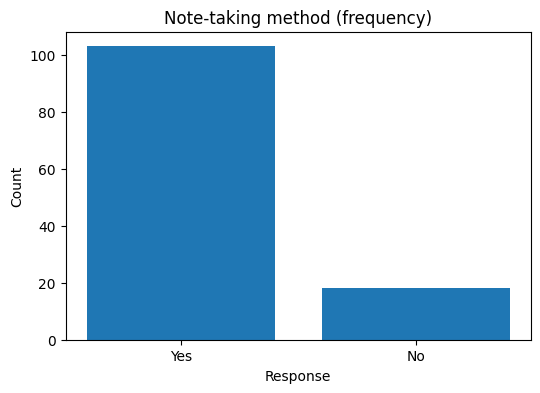

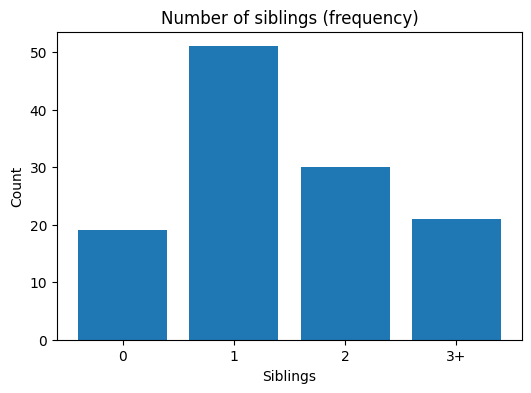

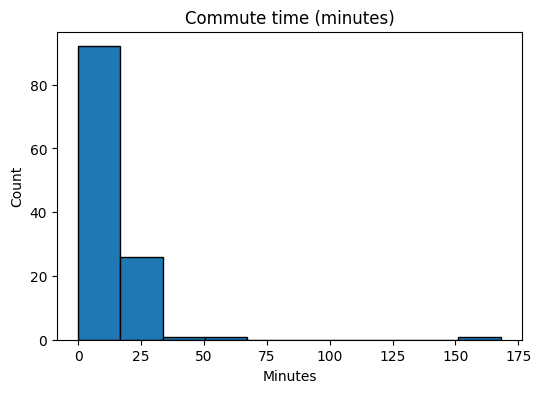

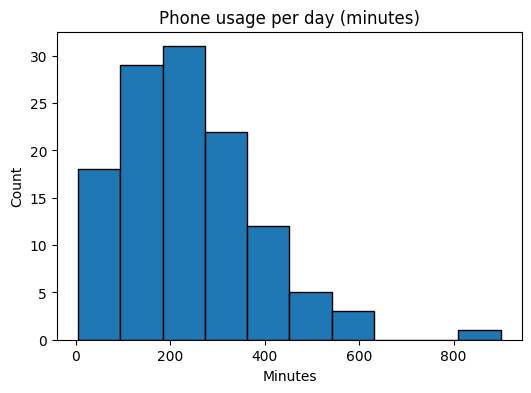

In [8]:
#@title Quick EDA

print("Frequency table for note-taking method:")
print(df["take_notes_digital"].value_counts(dropna=False))
print()

print("Frequency table for number of siblings:")
print(df["siblings"].value_counts(dropna=False).sort_index())
print()

print("mean and sd of one way commute time:")
print("mean=", df["commute_min"].mean())
print("sd=", df["commute_min"].std())

print("mean and sd of phone usage:")
print("mean=", df["phone_min"].mean())
print("sd=", df["phone_min"].std())


# 1) Bar plot: note-taking method (Digital vs Paper)
plt.figure()
vc_notes = df["take_notes_digital"].value_counts(dropna=False)
plt.bar(vc_notes.index.astype(str), vc_notes.values)
plt.title("Note-taking method (frequency)")
plt.xlabel("Response")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 2) Bar plot: number of siblings (discrete counts)
plt.figure()
vc_sib = df["siblings"].value_counts(dropna=False).sort_index()
plt.bar(vc_sib.index.astype(str), vc_sib.values)
plt.title("Number of siblings (frequency)")
plt.xlabel("Siblings")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 3) Histogram: one-way commute time (minutes)
plt.figure()
commute_clean = df["commute_min"].dropna().astype(float)
plt.hist(commute_clean, bins=10, edgecolor="k")
plt.title("Commute time (minutes)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

# 4) Histogram: phone usage (minutes/day)
plt.figure()
phone_clean = df["phone_min"].dropna().astype(float)
plt.hist(phone_clean, bins=10, edgecolor="k")
plt.title("Phone usage per day (minutes)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()


In [9]:
#@title Make a random sample of 50 individuals
df_sub = df.sample(n=50, random_state=seed)

Frequency table for note-taking method(sample):
take_notes_digital
Yes    44
No      6
Name: count, dtype: int64

Frequency table for number of siblings(sample):
siblings
0      7
1     24
2     11
3+     8
Name: count, dtype: int64

mean and sd of one way commute time(sample):
mean= 15.78
sd= 24.37235804625178
mean and sd of phone usage(sample):
mean= 245.06
sd= 150.3042370443009


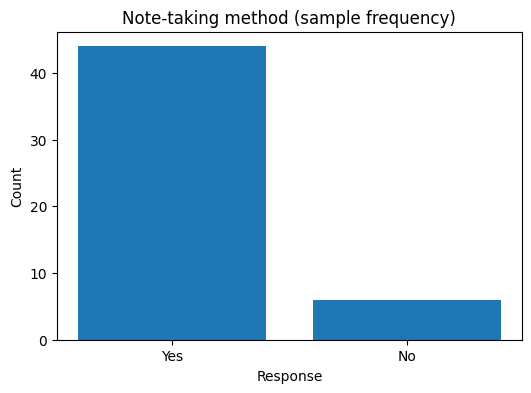

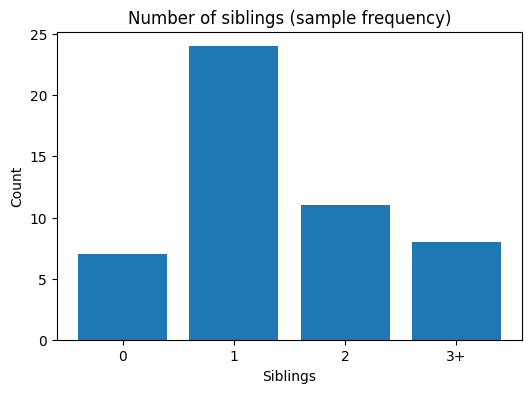

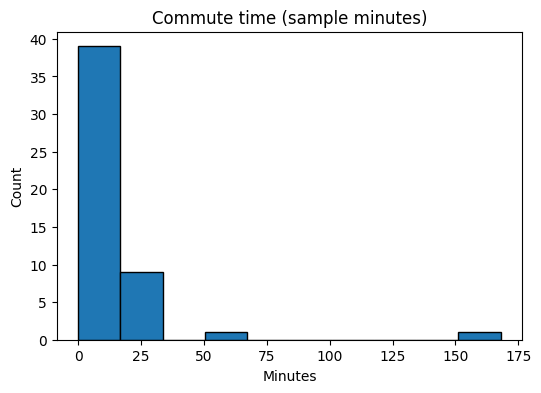

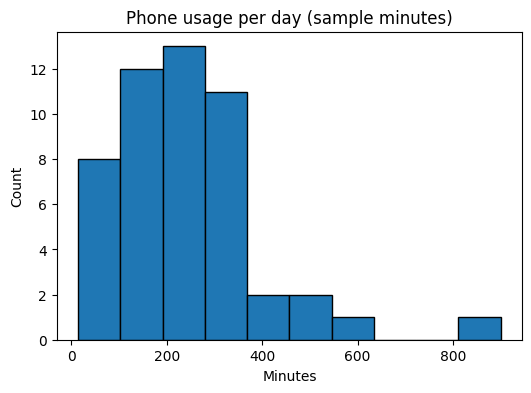

In [10]:
#@title EDA and plots for sample

print("Frequency table for note-taking method(sample):")
print(df_sub["take_notes_digital"].value_counts(dropna=False))
print()

print("Frequency table for number of siblings(sample):")
print(df_sub["siblings"].value_counts(dropna=False).sort_index())
print()

print("mean and sd of one way commute time(sample):")
print("mean=", df_sub["commute_min"].mean())
print("sd=", df_sub["commute_min"].std())

print("mean and sd of phone usage(sample):")
print("mean=", df_sub["phone_min"].mean())
print("sd=", df_sub["phone_min"].std())



# Do EDA for the sample of 50 individuals here.

# 1) Bar plot: note-taking method (Digital vs Paper)
plt.figure()
vc_notes_sub = df_sub["take_notes_digital"].value_counts(dropna=False)
plt.bar(vc_notes_sub.index.astype(str), vc_notes_sub.values)
plt.title("Note-taking method (sample frequency)")
plt.xlabel("Response")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 2) Bar plot: number of siblings (discrete counts)
plt.figure()
vc_sib_sub = df_sub["siblings"].value_counts(dropna=False).sort_index()
plt.bar(vc_sib_sub.index.astype(str), vc_sib_sub.values)
plt.title("Number of siblings (sample frequency)")
plt.xlabel("Siblings")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# 3) Histogram: one-way commute time (minutes)
plt.figure()
commute_clean_sub = df_sub["commute_min"].dropna().astype(float)
plt.hist(commute_clean_sub, bins=10, edgecolor="k")
plt.title("Commute time (sample minutes)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

# 4) Histogram: phone usage (minutes/day)
plt.figure()
phone_clean_sub = df_sub["phone_min"].dropna().astype(float)
plt.hist(phone_clean_sub, bins=10, edgecolor="k")
plt.title("Phone usage per day (sample minutes)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()





# Tests for sample

Use the sample `df_sub` (exactly 50 rows) you created earlier.  
Throughout, use the preset significance level **α = 0.10**.

Run and report each test with:   
- test statistic (z or t)   
- decision at **α = 0.10** (Reject / Fail to reject)

## Test 1: Proportion Z-test — Do atleast 80 percent students take **digital** notes?

$H_0: p \le p_0 \quad \text{vs}\quad H_1: p > p_0$

$p_0 = 0.8$

In [11]:
#@title Run proportion z-test
from scipy.stats import norm
p0 = 0.8
alternative = "greater"
alpha = 0.1
x = (df_sub["take_notes_digital"] == "Digital").sum()
n = len(df_sub)
p = x/n
z = (p-p0)/math.sqrt(p0*(1-p0)*n)
p_val = 1-norm.cdf(z)


if p_val < alpha:
  print("Reject H0, there is evidence that greater 80% of students take digital notes")
else:
  print("Fail to reject H0, there is not enough evidence that greater 80% of students take digital notes")


Fail to reject H0, there is not enough evidence that greater 80% of students take digital notes


## Test 2: Mean Z-test with **known σ** — Daily phone usage in minutes

$H_0: \mu \le \mu_0 \quad \text{vs}\quad H_1: \mu > \mu_0 $

- $\mu_0 = 210$ minutes (3 and half hours)
- Choose population $\sigma$

In [12]:
#@title Run mean z-test (known sigma) on phone minutes
mu0 = 210
sigma = df["phone_min"].std() #Population sd
alternative = "greater"

xbar = df_sub["phone_min"].mean()
n = len(df_sub)
z = (xbar-mu0)/(sigma/math.sqrt(n))
p_val = 1-norm.cdf(z)
alpha = 0.1
if p_val < alpha:
  print("Reject H0, there is evidence that the mean phone usage is greater than 3 and half hours")
  print("p-value:", p_val)
else:
  print("Fail to reject H0, there is not enough evidence that the mean phone usage is greater than 3 and half hours")
  print("p-value:", p_val)




Reject H0, there is evidence that the mean phone usage is greater than 3 and half hours
p-value: 0.04111575164457304


## Test 3: One-sample **t-test** — Commute minutes (unknown σ)

$ H_0: \mu = 10 \quad \text{vs}\quad H_1: \mu \ne 10$

In [13]:
#@title Run t-test on commute minutes
mu0 = 10
alternative = "two-sided"
xbar = df_sub["commute_min"].mean()
n = len(df_sub)
s = df_sub["commute_min"].std()
t = (xbar-mu0)/(s/math.sqrt(n))
p_val = 2*stats.t.cdf(-abs(t), df=n-1)
if p_val < alpha:
  print("Reject H0, there is evidence that the mean commute time is not 10 minutes")
  print("p-value:", p_val)
else:
  print("Fail to reject H0, there is not enough evidence that the mean commute time is not 10 minutes")
  print("p-value:", p_val)





Reject H0, there is evidence that the mean commute time is not 10 minutes
p-value: 0.09992512825477926


## Test 4: Proportion Z-test — Do half of the students have atmost 1 sibling?

p= proportion of students who have less or equal to 1 sibling.

$H_0: p = p_0 \quad \text{vs}\quad H_1: p \ne p_0$

$p_0 = 0.5$

In [19]:
#@title Run z-test on siblings
p0 = 0.5
alternative = "two-sided"
n = len(df_sub)
df_sub["siblings"] = pd.to_numeric(df_sub["siblings"], errors="coerce")
x = (df_sub["siblings"] <= 1).sum()
p = x/n
z = (p-p0)/math.sqrt(p0*(1-p0)/n)
p_val = 2*norm.cdf(-abs(z))
if p_val < alpha:
  print("Reject H0, there is evidence that half of the students have atmost 1 sibling")
  print("p-value:", p_val)
  print("z-score:", z)
else:
  print("Fail to reject H0, there is not enough evidence that half of the students have atmost 1 sibling")
  print("p-value:", p_val)
  print("z-score:", z)






Reject H0, there is evidence that half of the students have atmost 1 sibling
p-value: 0.08968602177036457
z-score: 1.697056274847714
